# Massive Data Algorithms Project 1

## Part 0: Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reload local python files every 2 seconds
%load_ext autoreload
%autoreload 2

In [4]:
# Set random seed
RANDOM_STATE = 999
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Part I: Construct LSH Hash Tables for All News Articles

### (a) Load dataset, report the number of articles and the number of features (n)

In [5]:
# Load the dataset
dataset_all = pd.read_csv('./bbc/bitvector_all.csv', sep="\t", header=None)
# Preview dataset dataset_all
dataset_all

,0,1,2,3,4,5,6,7,8,9,...,14919,14920,14921,14922,14923,14924,14925,14926,14927,14928
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tech
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,530,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
530,531,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
531,532,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
532,533,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tech


In [6]:
print("The number of articles in dataset "+'"'+"bitvector_all.csv"+'"'+" is:", len(dataset_all))
print("The number of features (n) per article is:", dataset_all.shape[1]-2)

The number of articles in dataset "bitvector_all.csv" is: 534
The number of features (n) per article is: 14927


In [7]:
# Load the dataset
dataset_query = pd.read_csv('./bbc/bitvector_query.csv', sep="\t", header=None)
# Preview dataset dataset_query
dataset_query

,0,1,2,3,4,5,6,7,8,9,...,14919,14920,14921,14922,14923,14924,14925,14926,14927,14928
0,531,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
1,532,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,entertainment
2,533,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tech
3,534,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tech


In [8]:
print("The number of articles in dataset "+'"'+"bitvector_query.csv"+'"'+" is:", len(dataset_query))
print("The number of features (n) per article is:", dataset_query.shape[1]-2)

The number of articles in dataset "bitvector_query.csv" is: 4
The number of features (n) per article is: 14927


### (b) Construct a family of MinHash functions in the LSH family

In [9]:
# Create a prime list with p ≥ n
prime_List = [15013, 16001, 17011, 18013, 19001, 20011, 21001, 22003, 23003, 24001]

In [10]:
# Create a list to store all parameters
PL_k2 = []
# Randomly generate the parameters of the hash function
for l in range(10):
    parameter = []
    for k in range(2):
        # Pick a large prime number p ≥ n
        p = random.choice(prime_List)
        # Pick a random pair of integers 0 < a < p, 0 ≤ b < p
        a = random.randint(1, p)
        b = random.randint(0, p)
        parameter.append([a, b, p])
    PL_k2.append(parameter)

In [11]:
# Generate a family of MinHash functions
for l in range(10):
    print("band", l+1)
    print("Hash function 1: ((", PL_k2[l][0][0], " * x + ", PL_k2[l][0][1], ") % ", PL_k2[l][0][2], ") % ", 14927, sep="")
    print("Hash function 2: ((", PL_k2[l][1][0], " * x + ", PL_k2[l][1][1], ") % ", PL_k2[l][1][2], ") % ", 14927, sep="")
    print()

band 1
Hash function 1: ((14688 * x + 14294) % 16001) % 14927
Hash function 2: ((18801 * x + 17488) % 24001) % 14927

band 2
Hash function 1: ((15840 * x + 4327) % 22003) % 14927
Hash function 2: ((3193 * x + 6160) % 20011) % 14927

band 3
Hash function 1: ((8670 * x + 1741) % 17011) % 14927
Hash function 2: ((13044 * x + 7429) % 19001) % 14927

band 4
Hash function 1: ((2454 * x + 8840) % 21001) % 14927
Hash function 2: ((3280 * x + 10520) % 15013) % 14927

band 5
Hash function 1: ((6830 * x + 6104) % 23003) % 14927
Hash function 2: ((5404 * x + 2833) % 20011) % 14927

band 6
Hash function 1: ((19504 * x + 15277) % 23003) % 14927
Hash function 2: ((4251 * x + 16372) % 20011) % 14927

band 7
Hash function 1: ((482 * x + 1804) % 22003) % 14927
Hash function 2: ((3650 * x + 7572) % 18013) % 14927

band 8
Hash function 1: ((8982 * x + 16433) % 21001) % 14927
Hash function 2: ((1386 * x + 5384) % 20011) % 14927

band 9
Hash function 1: ((3574 * x + 13971) % 22003) % 14927
Hash function 2: 

### (c) Construct LSH hash tables, report the collision distribution using heatmap plot

In [12]:
# Create signature matrix
def minhash(boolean_matrix, hash_functions):
    rows, cols, signature_rows = len(boolean_matrix), len(boolean_matrix[0]), len(hash_functions)
    # Initialize signature matrix
    signature_matrix = []
    for s in range(signature_rows):
        signature_matrix.append([sys.maxsize] * cols)
    for r in range(rows):
        hash_value = list(map(lambda x: x(r), hash_functions))
        # If boolean matrix value = 1 and signature value > hash value, replace signature value with the hash value
        for c in range(cols):
            if boolean_matrix[r][c] == 0:
                continue
            for i in range(signature_rows):
                if signature_matrix[i][c] > hash_value[i]:
                    signature_matrix[i][c] = hash_value[i]
    return signature_matrix

In [13]:
# Generate boolean matrix
boolean_matrix_all = dataset_all.iloc[:, 1:-1].T.values.tolist()
boolean_matrix_query = dataset_query.iloc[:, 1:-1].T.values.tolist()

In [14]:
# Check the data dimension of boolean matrix
print("In dataset "+'"'+"all"+'"'+", number of shingles: ", len(boolean_matrix_all), ", number of articles: ", len(boolean_matrix_all[0]), sep="")
print("In dataset "+'"'+"query"+'"'+", number of shingles: ", len(boolean_matrix_query), ", number of articles: ", len(boolean_matrix_query[0]), sep="")

In dataset "all", number of shingles: 14927, number of articles: 534
In dataset "query", number of shingles: 14927, number of articles: 4


In [15]:
# Create hash function h = ((ax + b) mod p) mod n
def h1(x):
    return ((PL_k2[l][0][0] * x + PL_k2[l][0][1]) % PL_k2[l][0][2]) % 14927
def h2(x):
    return ((PL_k2[l][1][0] * x + PL_k2[l][1][1]) % PL_k2[l][1][2]) % 14927

In [16]:
# Generate signature matrix
signature_matrix_all_k2 = []
for l in range(10):
    boolean_matrix = boolean_matrix_all
    signature_matrix_all_k2.append(minhash(boolean_matrix, [h1, h2]))
    
signature_matrix_query_k2 = []
for l in range(10):
    boolean_matrix = boolean_matrix_query
    signature_matrix_query_k2.append(minhash(boolean_matrix, [h1, h2]))

In [17]:
# Check the data dimension of signature matrix
print("Number of bands: ", len(signature_matrix_all_k2),
      "; Number of rows per band: ", len(signature_matrix_all_k2[0]),
      "; Number of articles: ", len(signature_matrix_all_k2[0][0]),sep="")

print("Number of bands: ", len(signature_matrix_query_k2),
      "; Number of rows per band: ", len(signature_matrix_query_k2[0]),
      "; Number of articles: ", len(signature_matrix_query_k2[0][0]),sep="")

Number of bands: 10; Number of rows per band: 2; Number of articles: 534
Number of bands: 10; Number of rows per band: 2; Number of articles: 4


In [18]:
def g_hash_function_k2(signature_matrix):
    g_hash_result = []
    for i in range(len(signature_matrix)):
        g_hash_value = []
        m = 600
        p = random.choice(prime_List)
        c0 = random.randint(0, p)
        c1 = random.randint(1, p)
        c2 = random.randint(1, p)
        for j in range(len(signature_matrix[0][0])):
            signature_matrix_value=[]
            for k in range(len(signature_matrix[0])):
                signature_matrix_value.append(signature_matrix[i][k][j])
            g_hash_value.append(((c0 + c1 * signature_matrix_value[0] + c2 * signature_matrix_value[1]) % p) % m)
        g_hash_result.append(g_hash_value)
    return g_hash_result

In [19]:
# Initialize the collision matrix
collision = [[0 for i in range(600)] for j in range(10)]
g_hash_result_k2 = g_hash_function_k2(signature_matrix_all_k2)
# Put the same hash result into the same bucket
for l in range(len(g_hash_result_k2)):
    for m in range(len(g_hash_result_k2[0])):
        bucket_num = g_hash_result_k2[l][m]
        collision[l][bucket_num] += 1

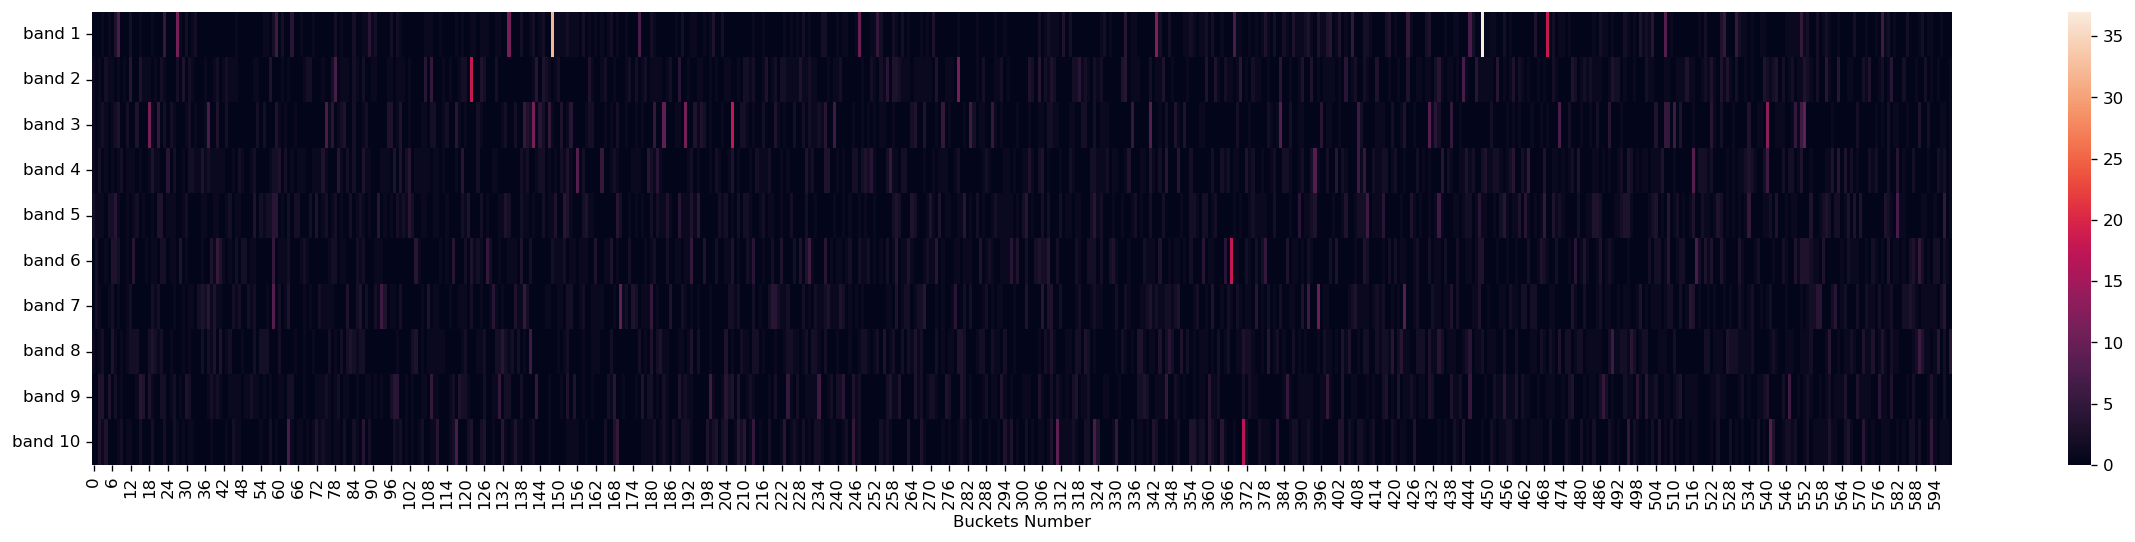

In [20]:
y_labels = ['band 1', 'band 2', 'band 3', 'band 4', 'band 5', 'band 6', 'band 7', 'band 8', 'band 9', 'band 10']
plt.figure(dpi=120,figsize=(25,5))
sns.heatmap(collision, yticklabels=y_labels)
plt.xlabel('Buckets Number')
plt.show()

## Part II: Nearest Neighbor Search

### (a) Query the LSH tables and return the top-10 articles that have the highest Jaccard similarities

#### (a.0) Define functions

In [21]:
# Retrieve articles with the same bucket number as the target article
def find_same_bucket(query_number, g_hash_result):
    same_bucket_list = []
    for l in range(len(g_hash_result)):
        bucket_num = []
        for m in range(len(g_hash_result[0])):
            if g_hash_result[l][m] == g_hash_result[l][query_number-1]:
                bucket_num.append(m+1)
        same_bucket_list.append(bucket_num)
    return same_bucket_list

In [22]:
# Extract the signature of each article from the signature matrix
def signature_extract(signature_matrix):
    flat_signature_matrix = [element for sub_list in signature_matrix for element in sub_list]
    signature_list = list(map(list, zip(*flat_signature_matrix)))
    return signature_list

In [23]:
# Compute Jaccard Similarity between q and each article in Dq
def jaccard_similarity_signature_matrix(query_article_number, signature_list_query, signature_list_all, sorted_same_bucket_list):
    index = dataset_query[(dataset_query[0] == query_article_number)].index.tolist()
    similarity = []
    for i in sorted_same_bucket_list:
        count = 0
        for j in range(len(signature_list_query[0])):
            if signature_list_query[index[0]][j] == signature_list_all[i-1][j]:
                count += 1
        similarity.append(float(count / len(signature_list_query[0])))
    return similarity

In [24]:
# Generate similarity table
def generate_similarity_table_bucketList(query_article_number, sorted_same_bucket_list, similarity):
    column_name = []
    for i in sorted_same_bucket_list:
        column_name.append(str(i))
    similarity_table = pd.DataFrame(similarity, columns=["Q "+str(query_article_number)], index=column_name).T
    return similarity_table

In [25]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
def generate_top10_table_bucketList(rank):
    news_id = []
    Jaccard_sim = []
    class_label = []
    if len(sorted_same_bucket_list) < 10:
        num = len(sorted_same_bucket_list)
    else:
        num = 10
    for i in range(num):
        news_id.append(rank.columns[i])
        Jaccard_sim.append(rank.iloc[0][i])
        class_label.append(dataset_all.iloc[:,-1][int(rank.columns[i])-1])
    top10_table = pd.DataFrame([news_id, Jaccard_sim, class_label], columns=list(range(1,num+1)), index=['news_id','Jaccard_sim','class_label']).T
    return top10_table

In [26]:
# Extract the signature of each article from the signature matrix
signature_list_all = signature_extract(signature_matrix_all_k2)
signature_list_query = signature_extract(signature_matrix_query_k2)

#### (a.1) Query article 531

In [27]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(531, g_hash_result_k2)
print(same_bucket_list)

[[114, 130, 314, 454, 510, 531], [418, 531], [118, 362, 483, 531], [162, 219, 531], [336, 531], [531], [89, 127, 165, 279, 531], [481, 483, 531], [324, 531], [314, 531]]


In [28]:
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
print(sorted_same_bucket_list)

[89, 114, 118, 127, 130, 162, 165, 219, 279, 314, 324, 336, 362, 418, 454, 481, 483, 510, 531]


In [29]:
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(531, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(531, sorted_same_bucket_list, similarity)
similarity_table

,89,114,118,127,130,162,165,219,279,314,324,336,362,418,454,481,483,510,531
Q 531,0.05,0.15,0.1,0.0,0.25,0.05,0.0,0.05,0.0,0.5,0.05,0.1,0.1,0.0,0.0,0.05,0.0,0.15,1.0


In [30]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_k2_531 = generate_top10_table_bucketList(rank)
top10_table_k2_531

,news_id,Jaccard_sim,class_label
1,531,1.0,entertainment
2,314,0.5,entertainment
3,130,0.25,entertainment
4,114,0.15,entertainment
5,510,0.15,entertainment
6,118,0.1,entertainment
7,362,0.1,entertainment
8,336,0.1,entertainment
9,481,0.05,entertainment
10,324,0.05,tech


#### (a.2) Query article 532

In [31]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(532, g_hash_result_k2)
print(same_bucket_list)

[[38, 76, 105, 116, 121, 125, 143, 201, 316, 349, 413, 427, 453, 455, 464, 522, 528, 532], [532], [146, 281, 320, 348, 386, 505, 528, 532], [438, 532], [532], [349, 532], [532], [148, 181, 245, 532], [532], [1, 131, 153, 532]]


In [32]:
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
print(sorted_same_bucket_list)

[1, 38, 76, 105, 116, 121, 125, 131, 143, 146, 148, 153, 181, 201, 245, 281, 316, 320, 348, 349, 386, 413, 427, 438, 453, 455, 464, 505, 522, 528, 532]


In [33]:
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(532, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(532, sorted_same_bucket_list, similarity)
similarity_table

,1,38,76,105,116,121,125,131,143,146,...,413,427,438,453,455,464,505,522,528,532
Q 532,0.0,0.1,0.15,0.1,0.1,0.1,0.1,0.1,0.15,0.15,...,0.1,0.15,0.05,0.15,0.1,0.1,0.1,0.1,0.2,1.0


In [34]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_k2_532 = generate_top10_table_bucketList(rank)
top10_table_k2_532

,news_id,Jaccard_sim,class_label
1,532,1.0,entertainment
2,528,0.2,tech
3,76,0.15,entertainment
4,453,0.15,tech
5,143,0.15,entertainment
6,146,0.15,entertainment
7,427,0.15,entertainment
8,201,0.1,tech
9,386,0.1,tech
10,455,0.1,tech


#### (a.3) Query article 533

In [35]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(533, g_hash_result_k2)
print(same_bucket_list)

[[58, 533], [406, 533], [75, 82, 108, 121, 124, 135, 166, 176, 287, 314, 341, 392, 444, 455, 464, 492, 512, 533], [151, 533], [16, 43, 533], [533], [91, 280, 455, 464, 488, 533], [22, 533], [337, 533], [533]]


In [36]:
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
print(sorted_same_bucket_list)

[16, 22, 43, 58, 75, 82, 91, 108, 121, 124, 135, 151, 166, 176, 280, 287, 314, 337, 341, 392, 406, 444, 455, 464, 488, 492, 512, 533]


In [37]:
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(533, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(533, sorted_same_bucket_list, similarity)
similarity_table

,16,22,43,58,75,82,91,108,121,124,...,341,392,406,444,455,464,488,492,512,533
Q 533,0.1,0.1,0.0,0.0,0.05,0.1,0.2,0.05,0.15,0.2,...,0.1,0.0,0.05,0.05,0.2,0.2,0.1,0.05,0.15,1.0


In [38]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_k2_533 = generate_top10_table_bucketList(rank)
top10_table_k2_533

,news_id,Jaccard_sim,class_label
1,533,1.0,tech
2,464,0.2,tech
3,455,0.2,tech
4,91,0.2,tech
5,124,0.2,tech
6,287,0.2,tech
7,512,0.15,tech
8,121,0.15,tech
9,166,0.1,tech
10,488,0.1,tech


#### (a.4) Query article 534

In [39]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(534, g_hash_result_k2)
print(same_bucket_list)

[[126, 283, 440, 462, 534], [437, 534], [534], [72, 534], [5, 193, 363, 534], [534], [133, 185, 447, 534], [534], [534], [534]]


In [40]:
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
print(sorted_same_bucket_list)

[5, 72, 126, 133, 185, 193, 283, 363, 437, 440, 447, 462, 534]


In [41]:
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(534, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(534, sorted_same_bucket_list, similarity)
similarity_table

,5,72,126,133,185,193,283,363,437,440,447,462,534
Q 534,0.05,0.05,0.0,0.0,0.05,0.1,0.25,0.2,0.05,0.15,0.15,0.15,1.0


In [42]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_k2_534 = generate_top10_table_bucketList(rank)
top10_table_k2_534

,news_id,Jaccard_sim,class_label
1,534,1.0,tech
2,283,0.25,tech
3,363,0.2,entertainment
4,440,0.15,tech
5,447,0.15,tech
6,462,0.15,tech
7,193,0.1,entertainment
8,5,0.05,entertainment
9,72,0.05,entertainment
10,185,0.05,entertainment


### (b) Compute Jaccard similarity for query q and all articles in the dataset

#### (b.0) Define functions

In [43]:
# Compute Jaccard Similarity for query q and all articles in the dataset
def jaccard_similarity_boolean_matrix(query_article_number, boolean_matrix_query_T, boolean_matrix_all_T):
    index = dataset_query[(dataset_query[0] == query_article_number)].index.tolist()
    similarity = []
    for i in boolean_matrix_all_T:
        intersection = np.logical_and(boolean_matrix_query_T[index[0]], i)
        union = np.logical_or(boolean_matrix_query_T[index[0]], i)
        similarity.append(float(intersection.sum() / union.sum()))
    return similarity

In [44]:
# Generate similarity table
def generate_similarity_table_allDataset(query_article_number, similarity):
    column_name = []
    for i in range(534):
        column_name.append(str(i+1))
    similarity_table = pd.DataFrame(similarity, columns=["Q "+str(query_article_number)], index=column_name).T
    return similarity_table

In [45]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
def generate_top10_table_allDataset(rank):
    news_id = []
    Jaccard_sim = []
    class_label = []
    for i in range(10):
        news_id.append(rank.columns[i])
        Jaccard_sim.append(rank.iloc[0][i])
        class_label.append(dataset_all.iloc[:,-1][int(rank.columns[i])-1])
    top10_table = pd.DataFrame([news_id, Jaccard_sim, class_label], columns=list(range(1,11)), index=['news_id','Jaccard_sim','class_label']).T
    return top10_table

In [46]:
# Transpose boolean matrix
boolean_matrix_all_T = list(map(list, zip(*boolean_matrix_all)))
boolean_matrix_query_T = list(map(list, zip(*boolean_matrix_query)))

#### (b.1) Query article 531

In [47]:
# Compute Jaccard Similarity for query q and all articles in the dataset
similarity = jaccard_similarity_boolean_matrix(531, boolean_matrix_query_T, boolean_matrix_all_T)
# Generate similarity table
similarity_table_truth_531 = generate_similarity_table_allDataset(531, similarity)
similarity_table_truth_531

,1,2,3,4,5,6,7,8,9,10,...,525,526,527,528,529,530,531,532,533,534
Q 531,0.013029,0.021164,0.025253,0.048485,0.018561,0.019048,0.030702,0.018957,0.020725,0.011719,...,0.015748,0.033473,0.015385,0.012158,0.022082,0.015873,1.0,0.036545,0.022951,0.009804


In [48]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table_truth_531.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_truth_531 = generate_top10_table_allDataset(rank)
top10_table_truth_531

,news_id,Jaccard_sim,class_label
1,531,1.0,entertainment
2,145,0.197183,entertainment
3,70,0.167785,entertainment
4,314,0.165385,entertainment
5,130,0.114583,entertainment
6,412,0.072398,entertainment
7,317,0.064516,entertainment
8,503,0.062147,entertainment
9,35,0.062112,entertainment
10,321,0.060302,entertainment


#### (b.2) Query article 532

In [49]:
# Compute Jaccard Similarity for query q and all articles in the dataset
similarity = jaccard_similarity_boolean_matrix(532, boolean_matrix_query_T, boolean_matrix_all_T)
# Generate similarity table
similarity_table_truth_532 = generate_similarity_table_allDataset(532, similarity)
similarity_table_truth_532

,1,2,3,4,5,6,7,8,9,10,...,525,526,527,528,529,530,531,532,533,534
Q 532,0.056738,0.028125,0.039877,0.05102,0.080827,0.029412,0.05698,0.035398,0.075051,0.034031,...,0.053476,0.058011,0.044843,0.056306,0.047836,0.028213,0.036545,1.0,0.069212,0.027027


In [50]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table_truth_532.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_truth_532 = generate_top10_table_allDataset(rank)
top10_table_truth_532

,news_id,Jaccard_sim,class_label
1,532,1.0,entertainment
2,419,0.094118,entertainment
3,42,0.094017,entertainment
4,520,0.092275,entertainment
5,524,0.09205,tech
6,197,0.091176,entertainment
7,251,0.091176,entertainment
8,501,0.090476,tech
9,221,0.090476,tech
10,125,0.089245,tech


#### (b.3) Query article 533

In [51]:
# Compute Jaccard Similarity for query q and all articles in the dataset
similarity = jaccard_similarity_boolean_matrix(533, boolean_matrix_query_T, boolean_matrix_all_T)
# Generate similarity table
similarity_table_truth_533 = generate_similarity_table_allDataset(533, similarity)
similarity_table_truth_533

,1,2,3,4,5,6,7,8,9,10,...,525,526,527,528,529,530,531,532,533,534
Q 533,0.109181,0.037855,0.039877,0.054608,0.078799,0.044776,0.048023,0.070122,0.111111,0.042216,...,0.047872,0.055096,0.04955,0.056306,0.067285,0.0347,0.022951,0.069212,1.0,0.033233


In [52]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table_truth_533.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_truth_533 = generate_top10_table_allDataset(rank)
top10_table_truth_533

,news_id,Jaccard_sim,class_label
1,533,1.0,tech
2,64,0.166667,tech
3,306,0.166227,tech
4,117,0.139151,tech
5,484,0.139151,tech
6,408,0.137209,tech
7,275,0.137209,tech
8,495,0.135632,tech
9,132,0.127098,tech
10,464,0.126543,tech


#### (b.4) Query article 534

In [53]:
# Compute Jaccard Similarity for query q and all articles in the dataset
similarity = jaccard_similarity_boolean_matrix(534, boolean_matrix_query_T, boolean_matrix_all_T)
# Generate similarity table
similarity_table_truth_534 = generate_similarity_table_allDataset(534, similarity)
similarity_table_truth_534

,1,2,3,4,5,6,7,8,9,10,...,525,526,527,528,529,530,531,532,533,534
Q 534,0.055728,0.004505,0.026432,0.025253,0.030769,0.033898,0.015326,0.029412,0.041769,0.043321,...,0.107692,0.053232,0.01983,0.049133,0.056716,0.023041,0.009804,0.027027,0.033233,1.0


In [54]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table_truth_534.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_truth_534 = generate_top10_table_allDataset(rank)
top10_table_truth_534

,news_id,Jaccard_sim,class_label
1,534,1.0,tech
2,211,0.122727,tech
3,324,0.110727,tech
4,330,0.110619,tech
5,371,0.110599,tech
6,183,0.110599,tech
7,525,0.107692,tech
8,83,0.091205,tech
9,440,0.090909,tech
10,255,0.088496,tech


### (c) Compare the query time in Part II(a) and Part II(b) per query in milliseconds

#### (c.1) Query time in Part II(a)

In [55]:
# Based on "Query article 531" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(531, g_hash_result_k2)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(531, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(531, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_k2_531 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k2_a531 = round(runtime, 2)

In [56]:
# Based on "Query article 532" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(532, g_hash_result_k2)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(532, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(532, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_k2_532 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k2_a532 = round(runtime, 2)

In [57]:
# Based on "Query article 533" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(533, g_hash_result_k2)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(533, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(533, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_k2_533 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k2_a533 = round(runtime, 2)

In [58]:
# Based on "Query article 534" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(534, g_hash_result_k2)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(534, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(534, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_k2_534 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k2_a534 = round(runtime, 2)

#### (c.2) Query time in Part II(b)

In [59]:
# Based on "Query article 531" and remove non-essential operations such as "print"
# Set start time
start = time.time()
similarity = jaccard_similarity_boolean_matrix(531, boolean_matrix_query_T, boolean_matrix_all_T)
similarity_table_truth_531 = generate_similarity_table_allDataset(531, similarity)
rank = similarity_table_truth_531.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_truth_531 = generate_top10_table_allDataset(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_b1 = round(runtime, 2)

In [60]:
# Based on "Query article 532" and remove non-essential operations such as "print"
# Set start time
start = time.time()
similarity = jaccard_similarity_boolean_matrix(532, boolean_matrix_query_T, boolean_matrix_all_T)
similarity_table_truth_532 = generate_similarity_table_allDataset(532, similarity)
rank = similarity_table_truth_532.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_truth_532 = generate_top10_table_allDataset(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_b2 = round(runtime, 2)

In [61]:
# Based on "Query article 533" and remove non-essential operations such as "print"
# Set start time
start = time.time()
similarity = jaccard_similarity_boolean_matrix(533, boolean_matrix_query_T, boolean_matrix_all_T)
similarity_table_truth_533 = generate_similarity_table_allDataset(533, similarity)
rank = similarity_table_truth_533.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_truth_533 = generate_top10_table_allDataset(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_b3 = round(runtime, 2)

In [62]:
# Based on "Query article 534" and remove non-essential operations such as "print"
# Set start time
start = time.time()
similarity = jaccard_similarity_boolean_matrix(534, boolean_matrix_query_T, boolean_matrix_all_T)
similarity_table_truth_534 = generate_similarity_table_allDataset(534, similarity)
rank = similarity_table_truth_534.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_truth_534 = generate_top10_table_allDataset(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_b4 = round(runtime, 2)

#### (c.3) Report query time and comment on their differences

In [63]:
print('When k=2, query time for query 531 in Part II(a):', runtime_k2_a531, 'ms')
print('When k=2, query time for query 532 in Part II(a):', runtime_k2_a532, 'ms')
print('When k=2, query time for query 533 in Part II(a):', runtime_k2_a533, 'ms')
print('When k=2, query time for query 534 in Part II(a):', runtime_k2_a534, 'ms')

When k=2, query time for query 531 in Part II(a): 3.99 ms
When k=2, query time for query 532 in Part II(a): 4.99 ms
When k=2, query time for query 533 in Part II(a): 3.92 ms
When k=2, query time for query 534 in Part II(a): 4.99 ms


In [64]:
print('Query time for query article 531 in Part II(b):', runtime_b1, 'ms')
print('Query time for query article 532 in Part II(b):', runtime_b2, 'ms')
print('Query time for query article 533 in Part II(b):', runtime_b3, 'ms')
print('Query time for query article 534 in Part II(b):', runtime_b4, 'ms')

Query time for query article 531 in Part II(b): 2217.71 ms
Query time for query article 532 in Part II(b): 2034.33 ms
Query time for query article 533 in Part II(b): 1986.65 ms
Query time for query article 534 in Part II(b): 2013.94 ms


From the above results, it can be observed that queries based on the Boolean Matrix (Bit Vector) are significantly slower than those based on Signature Matrix.
MinHash reduces the data dimension by the hash signature approach and constructs a Hash Table (set m buckets) so that similar results are put in the same bucket.
This greatly improves query efficiency, especially when dealing with massive data, which can significantly reduce query time.

## Part III: Search Quality Evaluation

### (a) Investigate the impact of the hash size (k)

#### (a.1) Query with hash size k = 4

##### (a.1.1) Construct a family of MinHash functions and generate LSH hash tables

In [65]:
# Create a list to store all parameters
PL_k4 = []
# Randomly generate the parameters of the hash function
for l in range(10):
    parameter = []
    for k in range(4):
        # Pick a large prime number p ≥ n
        p = random.choice(prime_List)
        # Pick a random pair of integers 0 < a < p, 0 ≤ b < p
        a = random.randint(1, p)
        b = random.randint(0, p)
        parameter.append([a, b, p])
    PL_k4.append(parameter)

In [66]:
# Generate a family of MinHash functions
for l in range(10):
    print("band", l+1)
    print("Hash function 1: ((", PL_k4[l][0][0], " * x + ", PL_k4[l][0][1], ") % ", PL_k4[l][0][2], ") % ", 14927, sep="")
    print("Hash function 2: ((", PL_k4[l][1][0], " * x + ", PL_k4[l][1][1], ") % ", PL_k4[l][1][2], ") % ", 14927, sep="")
    print("Hash function 3: ((", PL_k4[l][2][0], " * x + ", PL_k4[l][2][1], ") % ", PL_k4[l][2][2], ") % ", 14927, sep="")
    print("Hash function 4: ((", PL_k4[l][3][0], " * x + ", PL_k4[l][3][1], ") % ", PL_k4[l][3][2], ") % ", 14927, sep="")
    print()

band 1
Hash function 1: ((9213 * x + 8028) % 16001) % 14927
Hash function 2: ((4655 * x + 14228) % 20011) % 14927
Hash function 3: ((5484 * x + 14824) % 21001) % 14927
Hash function 4: ((1295 * x + 16456) % 23003) % 14927

band 2
Hash function 1: ((17353 * x + 3490) % 19001) % 14927
Hash function 2: ((14817 * x + 1596) % 19001) % 14927
Hash function 3: ((16062 * x + 9106) % 17011) % 14927
Hash function 4: ((7380 * x + 11552) % 24001) % 14927

band 3
Hash function 1: ((9223 * x + 8011) % 15013) % 14927
Hash function 2: ((263 * x + 12791) % 23003) % 14927
Hash function 3: ((14835 * x + 16418) % 21001) % 14927
Hash function 4: ((4427 * x + 11446) % 20011) % 14927

band 4
Hash function 1: ((12941 * x + 3540) % 15013) % 14927
Hash function 2: ((9240 * x + 11598) % 22003) % 14927
Hash function 3: ((257 * x + 17639) % 18013) % 14927
Hash function 4: ((16147 * x + 1303) % 20011) % 14927

band 5
Hash function 1: ((9165 * x + 8855) % 20011) % 14927
Hash function 2: ((18648 * x + 3485) % 21001) %

In [67]:
# Create hash function h = ((ax + b) mod p) mod n
def h1(x):
    return ((PL_k4[l][0][0] * x + PL_k4[l][0][1]) % PL_k4[l][0][2]) % 14927
def h2(x):
    return ((PL_k4[l][1][0] * x + PL_k4[l][1][1]) % PL_k4[l][1][2]) % 14927
def h3(x):
    return ((PL_k4[l][2][0] * x + PL_k4[l][2][1]) % PL_k4[l][2][2]) % 14927
def h4(x):
    return ((PL_k4[l][3][0] * x + PL_k4[l][3][1]) % PL_k4[l][3][2]) % 14927

In [68]:
# Generate signature matrix
signature_matrix_all_k4 = []
for l in range(10):
    boolean_matrix = boolean_matrix_all
    signature_matrix_all_k4.append(minhash(boolean_matrix, [h1, h2, h3, h4]))
    
signature_matrix_query_k4 = []
for l in range(10):
    boolean_matrix = boolean_matrix_query
    signature_matrix_query_k4.append(minhash(boolean_matrix, [h1, h2, h3, h4]))

In [69]:
# Check the data dimension of signature matrix
print("Number of bands: ", len(signature_matrix_all_k4),
      "; Number of rows per band: ", len(signature_matrix_all_k4[0]),
      "; Number of articles: ", len(signature_matrix_all_k4[0][0]),sep="")

print("Number of bands: ", len(signature_matrix_query_k4),
      "; Number of rows per band: ", len(signature_matrix_query_k4[0]),
      "; Number of articles: ", len(signature_matrix_query_k4[0][0]),sep="")

Number of bands: 10; Number of rows per band: 4; Number of articles: 534
Number of bands: 10; Number of rows per band: 4; Number of articles: 4


In [70]:
def g_hash_function_k4(signature_matrix):
    g_hash_result = []
    for i in range(len(signature_matrix)):
        g_hash_value = []
        m = 600
        p = random.choice(prime_List)
        c0 = random.randint(0, p)
        c1 = random.randint(1, p)
        c2 = random.randint(1, p)
        c3 = random.randint(1, p)
        c4 = random.randint(1, p)
        for j in range(len(signature_matrix[0][0])):
            signature_matrix_value=[]
            for k in range(len(signature_matrix[0])):
                signature_matrix_value.append(signature_matrix[i][k][j])
            g_hash_value.append(((c0 + c1 * signature_matrix_value[0] + c2 * signature_matrix_value[1] + c3 * signature_matrix_value[2] + c4 * signature_matrix_value[3]) % p) % m)
        g_hash_result.append(g_hash_value)
    return g_hash_result

In [71]:
g_hash_result_k4 = g_hash_function_k4(signature_matrix_all_k4)

##### (a.1.2) Query q using Part II(a) approach

In [72]:
# Extract the signature of each article from the signature matrix
signature_list_all = signature_extract(signature_matrix_all_k4)
signature_list_query = signature_extract(signature_matrix_query_k4)

In [73]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(531, g_hash_result_k4)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(531, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(531, sorted_same_bucket_list, similarity)
similarity_table

,113,127,237,279,288,421,457,458,460,505,507,531
Q 531,0.05,0.1,0.025,0.1,0.075,0.025,0.05,0.025,0.05,0.025,0.05,1.0


In [74]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_k4_531 = generate_top10_table_bucketList(rank)
top10_table_k4_531

,news_id,Jaccard_sim,class_label
1,531,1.0,entertainment
2,127,0.1,tech
3,279,0.1,tech
4,288,0.075,entertainment
5,113,0.05,tech
6,457,0.05,entertainment
7,460,0.05,tech
8,507,0.05,entertainment
9,237,0.025,tech
10,421,0.025,entertainment


In [75]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(532, g_hash_result_k4)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(532, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(532, sorted_same_bucket_list, similarity)
similarity_table

,15,19,36,47,87,119,201,211,398,471,473,476,520,532
Q 532,0.025,0.125,0.1,0.125,0.025,0.075,0.125,0.075,0.075,0.1,0.05,0.025,0.125,1.0


In [76]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_k4_532 = generate_top10_table_bucketList(rank)
top10_table_k4_532

,news_id,Jaccard_sim,class_label
1,532,1.0,entertainment
2,19,0.125,tech
3,47,0.125,tech
4,201,0.125,tech
5,520,0.125,entertainment
6,36,0.1,tech
7,471,0.1,entertainment
8,119,0.075,entertainment
9,211,0.075,tech
10,398,0.075,tech


In [77]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(533, g_hash_result_k4)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(533, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(533, sorted_same_bucket_list, similarity)
similarity_table

,96,128,231,232,262,300,347,349,533
Q 533,0.125,0.0,0.0,0.025,0.05,0.0,0.125,0.075,1.0


In [78]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_k4_533 = generate_top10_table_bucketList(rank)
top10_table_k4_533

,news_id,Jaccard_sim,class_label
1,533,1.0,tech
2,96,0.125,entertainment
3,347,0.125,tech
4,349,0.075,entertainment
5,262,0.05,tech
6,232,0.025,entertainment
7,128,0.0,entertainment
8,231,0.0,entertainment
9,300,0.0,entertainment


In [79]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(534, g_hash_result_k4)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(534, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(534, sorted_same_bucket_list, similarity)
similarity_table

,3,4,7,70,72,167,310,318,342,367,459,502,534
Q 534,0.05,0.0,0.05,0.025,0.025,0.0,0.075,0.025,0.075,0.025,0.0,0.025,1.0


In [80]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_k4_534 = generate_top10_table_bucketList(rank)
top10_table_k4_534

,news_id,Jaccard_sim,class_label
1,534,1.0,tech
2,310,0.075,tech
3,342,0.075,tech
4,3,0.05,entertainment
5,7,0.05,entertainment
6,70,0.025,entertainment
7,72,0.025,entertainment
8,318,0.025,entertainment
9,367,0.025,entertainment
10,502,0.025,entertainment


#### (a.2) Query with hash size k = 8

##### (a.2.1) Construct a family of MinHash functions and generate LSH hash tables

In [81]:
# Create a list to store all parameters
PL_k8 = []
# Randomly generate the parameters of the hash function
for l in range(10):
    parameter = []
    for k in range(8):
        # Pick a large prime number p ≥ n
        p = random.choice(prime_List)
        # Pick a random pair of integers 0 < a < p, 0 ≤ b < p
        a = random.randint(1, p)
        b = random.randint(0, p)
        parameter.append([a, b, p])
    PL_k8.append(parameter)

In [82]:
# Generate a family of MinHash functions
for l in range(10):
    print("band", l+1)
    print("Hash function 1: ((", PL_k8[l][0][0], " * x + ", PL_k8[l][0][1], ") % ", PL_k8[l][0][2], ") % ", 14927, sep="")
    print("Hash function 2: ((", PL_k8[l][1][0], " * x + ", PL_k8[l][1][1], ") % ", PL_k8[l][1][2], ") % ", 14927, sep="")
    print("Hash function 3: ((", PL_k8[l][2][0], " * x + ", PL_k8[l][2][1], ") % ", PL_k8[l][2][2], ") % ", 14927, sep="")
    print("Hash function 4: ((", PL_k8[l][3][0], " * x + ", PL_k8[l][3][1], ") % ", PL_k8[l][3][2], ") % ", 14927, sep="")
    print("Hash function 5: ((", PL_k8[l][4][0], " * x + ", PL_k8[l][4][1], ") % ", PL_k8[l][4][2], ") % ", 14927, sep="")
    print("Hash function 6: ((", PL_k8[l][5][0], " * x + ", PL_k8[l][5][1], ") % ", PL_k8[l][5][2], ") % ", 14927, sep="")
    print("Hash function 7: ((", PL_k8[l][6][0], " * x + ", PL_k8[l][6][1], ") % ", PL_k8[l][6][2], ") % ", 14927, sep="")
    print("Hash function 8: ((", PL_k8[l][7][0], " * x + ", PL_k8[l][7][1], ") % ", PL_k8[l][7][2], ") % ", 14927, sep="")
    print()

band 1
Hash function 1: ((14643 * x + 10499) % 15013) % 14927
Hash function 2: ((9852 * x + 10881) % 24001) % 14927
Hash function 3: ((10085 * x + 4657) % 16001) % 14927
Hash function 4: ((9538 * x + 15555) % 20011) % 14927
Hash function 5: ((15116 * x + 8470) % 18013) % 14927
Hash function 6: ((2101 * x + 11996) % 16001) % 14927
Hash function 7: ((9655 * x + 5599) % 18013) % 14927
Hash function 8: ((5655 * x + 10287) % 24001) % 14927

band 2
Hash function 1: ((6871 * x + 16075) % 24001) % 14927
Hash function 2: ((7284 * x + 3566) % 15013) % 14927
Hash function 3: ((6195 * x + 4050) % 16001) % 14927
Hash function 4: ((785 * x + 3987) % 16001) % 14927
Hash function 5: ((3265 * x + 4619) % 15013) % 14927
Hash function 6: ((7276 * x + 3167) % 19001) % 14927
Hash function 7: ((14222 * x + 14375) % 19001) % 14927
Hash function 8: ((16879 * x + 19514) % 24001) % 14927

band 3
Hash function 1: ((19741 * x + 16877) % 20011) % 14927
Hash function 2: ((9674 * x + 4429) % 15013) % 14927
Hash func

In [83]:
# Create hash function h = ((ax + b) mod p) mod n
def h1(x):
    return ((PL_k8[l][0][0] * x + PL_k8[l][0][1]) % PL_k8[l][0][2]) % 14927
def h2(x):
    return ((PL_k8[l][1][0] * x + PL_k8[l][1][1]) % PL_k8[l][1][2]) % 14927
def h3(x):
    return ((PL_k8[l][2][0] * x + PL_k8[l][2][1]) % PL_k8[l][2][2]) % 14927
def h4(x):
    return ((PL_k8[l][3][0] * x + PL_k8[l][3][1]) % PL_k8[l][3][2]) % 14927
def h5(x):
    return ((PL_k8[l][4][0] * x + PL_k8[l][4][1]) % PL_k8[l][4][2]) % 14927
def h6(x):
    return ((PL_k8[l][5][0] * x + PL_k8[l][5][1]) % PL_k8[l][5][2]) % 14927
def h7(x):
    return ((PL_k8[l][6][0] * x + PL_k8[l][6][1]) % PL_k8[l][6][2]) % 14927
def h8(x):
    return ((PL_k8[l][7][0] * x + PL_k8[l][7][1]) % PL_k8[l][7][2]) % 14927

In [84]:
# Generate signature matrix
signature_matrix_all_k8 = []
for l in range(10):
    boolean_matrix = boolean_matrix_all
    signature_matrix_all_k8.append(minhash(boolean_matrix, [h1, h2, h3, h4, h5, h6, h7, h8]))
    
signature_matrix_query_k8 = []
for l in range(10):
    boolean_matrix = boolean_matrix_query
    signature_matrix_query_k8.append(minhash(boolean_matrix, [h1, h2, h3, h4, h5, h6, h7, h8]))

In [85]:
# Check the data dimension of signature matrix
print("Number of bands: ", len(signature_matrix_all_k8),
      "; Number of rows per band: ", len(signature_matrix_all_k8[0]),
      "; Number of articles: ", len(signature_matrix_all_k8[0][0]),sep="")

print("Number of bands: ", len(signature_matrix_query_k8),
      "; Number of rows per band: ", len(signature_matrix_query_k8[0]),
      "; Number of articles: ", len(signature_matrix_query_k8[0][0]),sep="")

Number of bands: 10; Number of rows per band: 8; Number of articles: 534
Number of bands: 10; Number of rows per band: 8; Number of articles: 4


In [86]:
def g_hash_function_k8(signature_matrix):
    g_hash_result = []
    for i in range(len(signature_matrix)):
        g_hash_value = []
        m = 600
        p = random.choice(prime_List)
        c0 = random.randint(0, p)
        c1 = random.randint(1, p)
        c2 = random.randint(1, p)
        c3 = random.randint(1, p)
        c4 = random.randint(1, p)
        c5 = random.randint(1, p)
        c6 = random.randint(1, p)
        c7 = random.randint(1, p)
        c8 = random.randint(1, p)
        for j in range(len(signature_matrix[0][0])):
            signature_matrix_value=[]
            for k in range(len(signature_matrix[0])):
                signature_matrix_value.append(signature_matrix[i][k][j])
            g_hash_value.append(((c0 + c1 * signature_matrix_value[0] + c2 * signature_matrix_value[1] + c3 * signature_matrix_value[2] + c4 * signature_matrix_value[3]
                                  + c5 * signature_matrix_value[4] + c6 * signature_matrix_value[5] + c7 * signature_matrix_value[6] + c8 * signature_matrix_value[7]) % p) % m)
        g_hash_result.append(g_hash_value)
    return g_hash_result

In [87]:
g_hash_result_k8 = g_hash_function_k8(signature_matrix_all_k8)

##### (a.2.2) Query q using Part II(a) approach

In [88]:
# Extract the signature of each article from the signature matrix
signature_list_all = signature_extract(signature_matrix_all_k8)
signature_list_query = signature_extract(signature_matrix_query_k8)

In [89]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(531, g_hash_result_k8)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(531, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(531, sorted_same_bucket_list, similarity)
similarity_table

,48,80,260,271,358,407,424,452,531
Q 531,0.0,0.0375,0.0125,0.0375,0.0375,0.0,0.0125,0.025,1.0


In [90]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_k8_531 = generate_top10_table_bucketList(rank)
top10_table_k8_531

,news_id,Jaccard_sim,class_label
1,531,1.0,entertainment
2,80,0.0375,entertainment
3,271,0.0375,tech
4,358,0.0375,entertainment
5,452,0.025,entertainment
6,260,0.0125,tech
7,424,0.0125,entertainment
8,48,0.0,entertainment
9,407,0.0,tech


In [91]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(532, g_hash_result_k8)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(532, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(532, sorted_same_bucket_list, similarity)
similarity_table

,19,37,47,117,144,236,273,292,331,366,418,484,530,532
Q 532,0.1,0.05,0.1,0.1,0.0375,0.0875,0.025,0.0625,0.0375,0.05,0.025,0.1,0.0375,1.0


In [92]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_k8_532 = generate_top10_table_bucketList(rank)
top10_table_k8_532

,news_id,Jaccard_sim,class_label
1,532,1.0,entertainment
2,19,0.1,tech
3,47,0.1,tech
4,117,0.1,tech
5,484,0.1,tech
6,236,0.0875,tech
7,292,0.0625,tech
8,37,0.05,entertainment
9,366,0.05,entertainment
10,144,0.0375,tech


In [93]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(533, g_hash_result_k8)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(533, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(533, sorted_same_bucket_list, similarity)
similarity_table

,27,94,121,168,172,173,199,227,248,443,533,534
Q 533,0.1875,0.0875,0.0375,0.0375,0.025,0.1625,0.0625,0.0875,0.0375,0.0625,1.0,0.0875


In [94]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_k8_533 = generate_top10_table_bucketList(rank)
top10_table_k8_533

,news_id,Jaccard_sim,class_label
1,533,1.0,tech
2,27,0.1875,tech
3,173,0.1625,tech
4,94,0.0875,tech
5,227,0.0875,tech
6,534,0.0875,tech
7,199,0.0625,entertainment
8,443,0.0625,entertainment
9,121,0.0375,tech
10,168,0.0375,entertainment


In [95]:
# Retrieve articles with the same bucket number as the target article
same_bucket_list = find_same_bucket(534, g_hash_result_k8)
# Flattening, deduplication and sorting
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
# Compute Jaccard Similarity between q and each article in Dq
similarity = jaccard_similarity_signature_matrix(534, signature_list_query, signature_list_all, sorted_same_bucket_list)
# Generate similarity table
similarity_table = generate_similarity_table_bucketList(534, sorted_same_bucket_list, similarity)
similarity_table

,8,26,52,144,172,190,368,370,374,533,534
Q 534,0.1,0.0375,0.0625,0.0375,0.05,0.0,0.0,0.0,0.05,0.0875,1.0


In [96]:
# Generate the list of top-10 articles with highest Jaccard Similarity in descending order for each query q
rank = similarity_table.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_k8_534 = generate_top10_table_bucketList(rank)
top10_table_k8_534

,news_id,Jaccard_sim,class_label
1,534,1.0,tech
2,8,0.1,tech
3,533,0.0875,tech
4,52,0.0625,entertainment
5,172,0.05,tech
6,374,0.05,entertainment
7,26,0.0375,tech
8,144,0.0375,tech
9,190,0.0,tech
10,368,0.0,entertainment


#### (a.3) Compute the F1-score

##### (a.3.1) Define functions

In [97]:
# Computer F1q
def F1q(top10_list, top10_list_truth):
    TP = (len(top10_list) + len(top10_list_truth)) - len(list(set(top10_list + top10_list_truth)))
    FP = len(top10_list) - TP
    FN = len(top10_list_truth) - TP
    F1q = TP/(TP+0.5*(FP+FN))
    return F1q

In [98]:
# Extract query result to list
def dftolist(top10_table):
    strList = top10_table.iloc[:,0].tolist()
    intList = list(map(int, strList))
    return intList

##### (a.3.2) Extract query result to list

In [99]:
top10_list_truth_531 = dftolist(top10_table_truth_531)
top10_list_truth_532 = dftolist(top10_table_truth_532)
top10_list_truth_533 = dftolist(top10_table_truth_533)
top10_list_truth_534 = dftolist(top10_table_truth_534)

In [100]:
top10_list_k2_531 = dftolist(top10_table_k2_531)
top10_list_k2_532 = dftolist(top10_table_k2_532)
top10_list_k2_533 = dftolist(top10_table_k2_533)
top10_list_k2_534 = dftolist(top10_table_k2_534)

In [101]:
top10_list_k4_531 = dftolist(top10_table_k4_531)
top10_list_k4_532 = dftolist(top10_table_k4_532)
top10_list_k4_533 = dftolist(top10_table_k4_533)
top10_list_k4_534 = dftolist(top10_table_k4_534)

In [102]:
top10_list_k8_531 = dftolist(top10_table_k8_531)
top10_list_k8_532 = dftolist(top10_table_k8_532)
top10_list_k8_533 = dftolist(top10_table_k8_533)
top10_list_k8_534 = dftolist(top10_table_k8_534)

##### (a.3.3) Compute the F1-score for each query q

In [103]:
F1q_k2_531 = F1q(top10_list_k2_531, top10_list_truth_531)
F1q_k2_532 = F1q(top10_list_k2_532, top10_list_truth_532)
F1q_k2_533 = F1q(top10_list_k2_533, top10_list_truth_533)
F1q_k2_534 = F1q(top10_list_k2_534, top10_list_truth_534)

In [104]:
F1q_k4_531 = F1q(top10_list_k4_531, top10_list_truth_531)
F1q_k4_532 = F1q(top10_list_k4_532, top10_list_truth_532)
F1q_k4_533 = F1q(top10_list_k4_533, top10_list_truth_533)
F1q_k4_534 = F1q(top10_list_k4_534, top10_list_truth_534)

In [105]:
F1q_k8_531 = F1q(top10_list_k8_531, top10_list_truth_531)
F1q_k8_532 = F1q(top10_list_k8_532, top10_list_truth_532)
F1q_k8_533 = F1q(top10_list_k8_533, top10_list_truth_533)
F1q_k8_534 = F1q(top10_list_k8_534, top10_list_truth_534)

##### (a.3.4) Output F1q and average F1-score

In [106]:
print("When k=2 the F1q of query 531:", F1q_k2_531)
print("When k=2 the F1q of query 532:", F1q_k2_532)
print("When k=2 the F1q of query 533:", F1q_k2_533)
print("When k=2 the F1q of query 534:", F1q_k2_534)

When k=2 the F1q of query 531: 0.3
When k=2 the F1q of query 532: 0.1
When k=2 the F1q of query 533: 0.2
When k=2 the F1q of query 534: 0.2


In [107]:
avg_F1_k2 = np.mean([F1q_k2_531, F1q_k2_532, F1q_k2_533, F1q_k2_534])
print("The average of F1-score at k=2:", avg_F1_k2)

The average of F1-score at k=2: 0.2


In [108]:
print("When k=4 the F1q of query 531:", F1q_k4_531)
print("When k=4 the F1q of query 532:", F1q_k4_532)
print("When k=4 the F1q of query 533:", F1q_k4_533)
print("When k=4 the F1q of query 534:", F1q_k4_534)

When k=4 the F1q of query 531: 0.1
When k=4 the F1q of query 532: 0.2
When k=4 the F1q of query 533: 0.10526315789473684
When k=4 the F1q of query 534: 0.1


In [109]:
avg_F1_k4 = np.mean([F1q_k4_531, F1q_k4_532, F1q_k4_533, F1q_k4_534])
print("The average of F1-score at k=4:", avg_F1_k4)

The average of F1-score at k=4: 0.12631578947368421


In [110]:
print("When k=8 the F1q of query 531:", F1q_k8_531)
print("When k=8 the F1q of query 532:", F1q_k8_532)
print("When k=8 the F1q of query 533:", F1q_k8_533)
print("When k=8 the F1q of query 534:", F1q_k8_534)

When k=8 the F1q of query 531: 0.10526315789473684
When k=8 the F1q of query 532: 0.1
When k=8 the F1q of query 533: 0.1
When k=8 the F1q of query 534: 0.1


In [111]:
avg_F1_k8 = np.mean([F1q_k8_531, F1q_k8_532, F1q_k8_533, F1q_k8_534])
print("The average of F1-score at k=8:", avg_F1_k8)

The average of F1-score at k=8: 0.10131578947368422


##### (a.3.5) Plot F1-score with a varying k=[2, 4, 8]

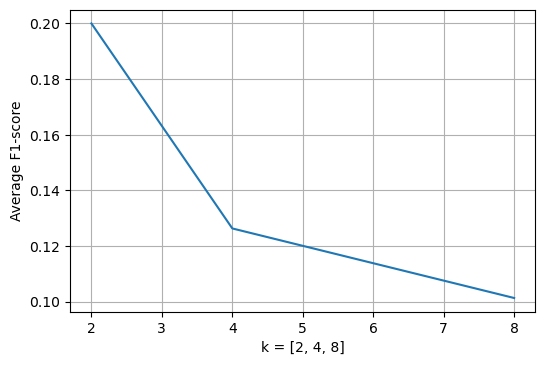

In [112]:
x = [2, 4, 8]
y = [avg_F1_k2, avg_F1_k4, avg_F1_k8]
plt.figure(dpi=100)
plt.plot(x, y)
plt.xlabel('k = [2, 4, 8]')
plt.ylabel('Average F1-score')
plt.grid()
plt.show()

From the above plot, it can be observed that as the hash size (k) increases, the average F1 score decreases.
This means that the hash size affects the query performance, the hash size k is NOT the bigger the better.

#### (a.4) The average query time in milliseconds with a varying k=[2, 4, 8]

##### (a.4.1) The query time with k = 4

In [113]:
# Based on "Query article 531" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(531, g_hash_result_k4)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(531, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(531, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_k4_531 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k4_a531 = round(runtime, 2)

In [114]:
# Based on "Query article 532" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(532, g_hash_result_k4)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(532, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(532, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_k4_532 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k4_a532 = round(runtime, 2)

In [115]:
# Based on "Query article 533" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(533, g_hash_result_k4)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(533, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(533, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_k4_533 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k4_a533 = round(runtime, 2)

In [116]:
# Based on "Query article 534" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(534, g_hash_result_k4)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(534, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(534, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_k4_534 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k4_a534 = round(runtime, 2)

##### (a.4.2) The query time with k = 8

In [117]:
# Based on "Query article 531" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(531, g_hash_result_k8)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(531, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(531, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 531', axis=1, ascending=False)
top10_table_k8_531 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k8_a531 = round(runtime, 2)

In [118]:
# Based on "Query article 532" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(532, g_hash_result_k8)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(532, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(532, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 532', axis=1, ascending=False)
top10_table_k8_532 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k8_a532 = round(runtime, 2)

In [119]:
# Based on "Query article 533" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(533, g_hash_result_k8)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(533, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(533, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 533', axis=1, ascending=False)
top10_table_k8_533 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k8_a533 = round(runtime, 2)

In [120]:
# Based on "Query article 534" and remove non-essential operations such as "print"
# Set start time
start = time.time()
same_bucket_list = find_same_bucket(534, g_hash_result_k8)
sorted_same_bucket_list = sorted(list(set([element for sub_list in same_bucket_list for element in sub_list])))
similarity = jaccard_similarity_signature_matrix(534, signature_list_query, signature_list_all, sorted_same_bucket_list)
similarity_table = generate_similarity_table_bucketList(534, sorted_same_bucket_list, similarity)
rank = similarity_table.sort_values(by='Q 534', axis=1, ascending=False)
top10_table_k8_534 = generate_top10_table_bucketList(rank)
# Set end time
end = time.time()
# Calculate runtime
runtime = (end - start) * 1000
runtime_k8_a534 = round(runtime, 2)

##### (a.4.3) Output query time with a varying k=[2, 4, 8]

In [121]:
print('When k=2, query time for query 531:', runtime_k2_a531, 'ms')
print('When k=2, query time for query 532:', runtime_k2_a532, 'ms')
print('When k=2, query time for query 533:', runtime_k2_a533, 'ms')
print('When k=2, query time for query 534:', runtime_k2_a534, 'ms')

When k=2, query time for query 531: 3.99 ms
When k=2, query time for query 532: 4.99 ms
When k=2, query time for query 533: 3.92 ms
When k=2, query time for query 534: 4.99 ms


In [122]:
avg_runtime_k2 = np.mean([runtime_k2_a531, runtime_k2_a532, runtime_k2_a533, runtime_k2_a534])
print("The average query time at k=2:", avg_runtime_k2)

The average query time at k=2: 4.4725


In [123]:
print('When k=4, query time for query 531:', runtime_k4_a531, 'ms')
print('When k=4, query time for query 532:', runtime_k4_a532, 'ms')
print('When k=4, query time for query 533:', runtime_k4_a533, 'ms')
print('When k=4, query time for query 534:', runtime_k4_a534, 'ms')

When k=4, query time for query 531: 3.99 ms
When k=4, query time for query 532: 4.98 ms
When k=4, query time for query 533: 4.99 ms
When k=4, query time for query 534: 5.98 ms


In [124]:
avg_runtime_k4 = np.mean([runtime_k4_a531, runtime_k4_a532, runtime_k4_a533, runtime_k4_a534])
print("The average query time at k=4:", avg_runtime_k4)

The average query time at k=4: 4.985


In [125]:
print('When k=8, query time for query 531:', runtime_k8_a531, 'ms')
print('When k=8, query time for query 532:', runtime_k8_a532, 'ms')
print('When k=8, query time for query 533:', runtime_k8_a533, 'ms')
print('When k=8, query time for query 534:', runtime_k8_a534, 'ms')

When k=8, query time for query 531: 6.98 ms
When k=8, query time for query 532: 7.98 ms
When k=8, query time for query 533: 4.99 ms
When k=8, query time for query 534: 4.99 ms


In [126]:
avg_runtime_k8 = np.mean([runtime_k8_a531, runtime_k8_a532, runtime_k8_a533, runtime_k8_a534])
print("The average query time at k=4:", avg_runtime_k8)

The average query time at k=4: 6.235000000000001


##### (a.4.4) Plot average query time with a varying k=[2, 4, 8]

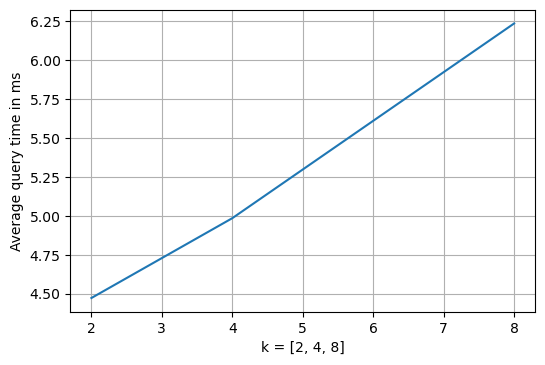

In [127]:
x = [2, 4, 8]
y = [avg_runtime_k2, avg_runtime_k4, avg_runtime_k8]
plt.figure(dpi=100)
plt.plot(x, y)
plt.xlabel('k = [2, 4, 8]')
plt.ylabel('Average query time in ms')
plt.grid()
plt.show()

From the above plot, it can be observed that as the hash size (k) increases, the average query time also increases.
This means that the hash size affects the query time, the hash size k is NOT the bigger the better.

Note: This comment is only for what was observed in this run.

In fact, we found in many runs that due to the influence of computer performance or operating environment, the query time does not necessarily increase with the increase of k. Sometimes the query time is the longest when k=4, and sometimes the query time is the shortest when k=8.

### (b) Explain and suggestion

In this part, we investigated the impact of different hash sizes (k) on query performance with the same number of bands (l=10).
We expect that as k increases, both the F1-score and the query time increase.

However, from Part III(a), it can be observed that as k increases, the query time does increase, but the F1-score decreases.
We speculate that perhaps because the data are too different, LSH cannot capture the distribution of data similarity.

In theory, we would like to make a trade-off between a higher F1-score and less query time.
But for this assignment, we can't give useful suggestions, because when k=2, both the F1-score and the query time are optimal.

We try an extra assignment, compute and check the trend of FP/FN as k increases.

## Extra

### (1) Define functions

In [128]:
# Computer [TP, FP, FN]
def F1q_extra(top10_list, top10_list_truth):
    TP = (len(top10_list) + len(top10_list_truth)) - len(list(set(top10_list + top10_list_truth)))
    FP = len(top10_list) - TP
    FN = len(top10_list_truth) - TP
    F1q = TP/(TP+0.5*(FP+FN))
    parameters = [TP, FP, FN]
    return parameters

### (2) Compute FP and FN for each query q

In [129]:
TPFPFN_k2_531 = F1q_extra(top10_list_k2_531, top10_list_truth_531)
TPFPFN_k2_532 = F1q_extra(top10_list_k2_532, top10_list_truth_532)
TPFPFN_k2_533 = F1q_extra(top10_list_k2_533, top10_list_truth_533)
TPFPFN_k2_534 = F1q_extra(top10_list_k2_534, top10_list_truth_534)

In [130]:
TPFPFN_k4_531 = F1q_extra(top10_list_k4_531, top10_list_truth_531)
TPFPFN_k4_532 = F1q_extra(top10_list_k4_532, top10_list_truth_532)
TPFPFN_k4_533 = F1q_extra(top10_list_k4_533, top10_list_truth_533)
TPFPFN_k4_534 = F1q_extra(top10_list_k4_534, top10_list_truth_534)

In [131]:
TPFPFN_k8_531 = F1q_extra(top10_list_k8_531, top10_list_truth_531)
TPFPFN_k8_532 = F1q_extra(top10_list_k8_532, top10_list_truth_532)
TPFPFN_k8_533 = F1q_extra(top10_list_k8_533, top10_list_truth_533)
TPFPFN_k8_534 = F1q_extra(top10_list_k8_534, top10_list_truth_534)

### (3) Output FP and FN

In [132]:
print("When k=2 the FP of query 531:", TPFPFN_k2_531[1])
print("When k=2 the FP of query 532:", TPFPFN_k2_532[1])
print("When k=2 the FP of query 533:", TPFPFN_k2_533[1])
print("When k=2 the FP of query 534:", TPFPFN_k2_534[1])

When k=2 the FP of query 531: 7
When k=2 the FP of query 532: 9
When k=2 the FP of query 533: 8
When k=2 the FP of query 534: 8


In [133]:
print("When k=2 the FN of query 531:", TPFPFN_k2_531[2])
print("When k=2 the FN of query 532:", TPFPFN_k2_532[2])
print("When k=2 the FN of query 533:", TPFPFN_k2_533[2])
print("When k=2 the FN of query 534:", TPFPFN_k2_534[2])

When k=2 the FN of query 531: 7
When k=2 the FN of query 532: 9
When k=2 the FN of query 533: 8
When k=2 the FN of query 534: 8


In [134]:
avg_FP_k2 = np.mean([TPFPFN_k2_531[1], TPFPFN_k2_532[1], TPFPFN_k2_533[1], TPFPFN_k2_534[1]])
print("The average of FP at k=2:", avg_FP_k2)

The average of FP at k=2: 8.0


In [135]:
avg_FN_k2 = np.mean([TPFPFN_k2_531[2], TPFPFN_k2_532[2], TPFPFN_k2_533[2], TPFPFN_k2_534[2]])
print("The average of FN at k=2:", avg_FN_k2)

The average of FN at k=2: 8.0


In [136]:
print("When k=4 the FP of query 531:", TPFPFN_k4_531[1])
print("When k=4 the FP of query 532:", TPFPFN_k4_532[1])
print("When k=4 the FP of query 533:", TPFPFN_k4_533[1])
print("When k=4 the FP of query 534:", TPFPFN_k4_534[1])

When k=4 the FP of query 531: 9
When k=4 the FP of query 532: 8
When k=4 the FP of query 533: 8
When k=4 the FP of query 534: 9


In [137]:
print("When k=4 the FN of query 531:", TPFPFN_k4_531[2])
print("When k=4 the FN of query 532:", TPFPFN_k4_532[2])
print("When k=4 the FN of query 533:", TPFPFN_k4_533[2])
print("When k=4 the FN of query 534:", TPFPFN_k4_534[2])

When k=4 the FN of query 531: 9
When k=4 the FN of query 532: 8
When k=4 the FN of query 533: 9
When k=4 the FN of query 534: 9


In [138]:
avg_FP_k4 = np.mean([TPFPFN_k4_531[1], TPFPFN_k4_532[1], TPFPFN_k4_533[1], TPFPFN_k4_534[1]])
print("The average of FP at k=4:", avg_FP_k4)

The average of FP at k=4: 8.5


In [139]:
avg_FN_k4 = np.mean([TPFPFN_k4_531[2], TPFPFN_k4_532[2], TPFPFN_k4_533[2], TPFPFN_k4_534[2]])
print("The average of FN at k=4:", avg_FN_k4)

The average of FN at k=4: 8.75


In [140]:
print("When k=8 the FP of query 531:", TPFPFN_k8_531[1])
print("When k=8 the FP of query 532:", TPFPFN_k8_532[1])
print("When k=8 the FP of query 533:", TPFPFN_k8_533[1])
print("When k=8 the FP of query 534:", TPFPFN_k8_534[1])

When k=8 the FP of query 531: 8
When k=8 the FP of query 532: 9
When k=8 the FP of query 533: 9
When k=8 the FP of query 534: 9


In [141]:
print("When k=8 the FN of query 531:", TPFPFN_k8_531[2])
print("When k=8 the FN of query 532:", TPFPFN_k8_532[2])
print("When k=8 the FN of query 533:", TPFPFN_k8_533[2])
print("When k=8 the FN of query 534:", TPFPFN_k8_534[2])

When k=8 the FN of query 531: 9
When k=8 the FN of query 532: 9
When k=8 the FN of query 533: 9
When k=8 the FN of query 534: 9


In [142]:
avg_FP_k8 = np.mean([TPFPFN_k8_531[1], TPFPFN_k8_532[1], TPFPFN_k8_533[1], TPFPFN_k8_534[1]])
print("The average of FP at k=8:", avg_FP_k8)

The average of FP at k=8: 8.75


In [143]:
avg_FN_k8 = np.mean([TPFPFN_k8_531[2], TPFPFN_k8_532[2], TPFPFN_k8_533[2], TPFPFN_k8_534[2]])
print("The average of FN at k=8:", avg_FN_k8)

The average of FN at k=8: 9.0


### (4) Plot FP and FN with a varying k=[2, 4, 8]

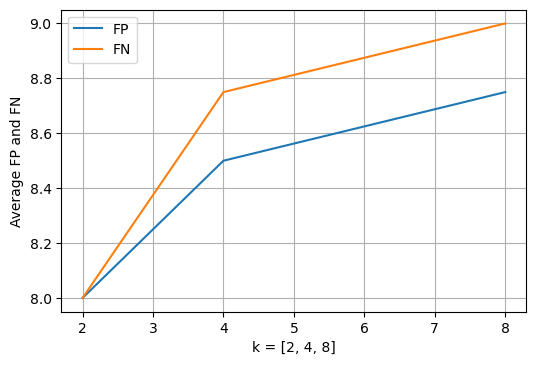

In [144]:
x = [2, 4, 8]
y_FP = [avg_FP_k2, avg_FP_k4, avg_FP_k8]
y_FN = [avg_FN_k2, avg_FN_k4, avg_FN_k8]
plt.figure(dpi=100)
plt.plot(x, y_FP, label='FP')
plt.plot(x, y_FN, label='FN')
plt.legend(loc='upper left')
plt.xlabel('k = [2, 4, 8]')
plt.ylabel('Average FP and FN')
plt.grid()
plt.show()

### (5) Conclusion

From the above two plots, we observed that as k increases, both FP/FN increase, which shows that LSH cannot capture the distribution of data similarity.
The possible reason is that the data itself is very different.